In [227]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from optimalEmbedding import run_optEmbedding
from GCCM_gao_corrected import run_GCCM_corrected
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [228]:
# Set specific font sizes
plt.rcParams.update({
    'font.size': 12,          # Global font size
    'axes.titlesize': 11,     # Title font size
    'axes.labelsize': 11,     # X and Y axis labels font size
    'xtick.labelsize': 9,    # X-axis tick labels font size
    'ytick.labelsize': 9,    # Y-axis tick labels font size
    'legend.fontsize': 10,    # Legend font size
})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
def get_mean(results, arr):
    xy = []
    yx = []
    for i in arr:
        xy.append(results['x_xmap_y'][i]['mean'])
        yx.append(results['y_xmap_x'][i]['mean'])
    return np.array(xy), np.array(yx)

In [189]:
dims = np.arange(1,9)
lib_sizes = np.arange(10,101,30)
lib_size = 100

## Reaction-diffusion systems

In [24]:
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright - 4 * Zcenter) / dx**2

In [25]:
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.viridis,
              interpolation='None')
           # extent=[-1, 1, -1, 1])
    ax.set_axis_off()

$$ \frac{\partial x}{\partial t} = a \Delta x - x^2 $$

$$ \frac{\partial y}{\partial t} = a \Delta y - y^2 + c~xy $$

## X -> Y

In [250]:
def plot(X_in, Y_in, T, c):
    X = X_in.copy()
    Y = Y_in.copy()
    
    dt = .001  # time step, 
    n = int(T / dt)  # number of iterations

    fig, axes = plt.subplots(2,9, figsize=(12, 4))
    step_plot = n // 9
    # We simulate the PDE with the finite difference
    # method.
    for i in range(n):
        # We compute the Laplacian of u and v.
        deltaX = laplacian(X)
        deltaY = laplacian(Y)
        # We take the values of u and v inside the grid.
        Xc = X[1:-1, 1:-1]
        Yc = Y[1:-1, 1:-1]
        
        # We update the variables.
        X[1:-1, 1:-1], Y[1:-1, 1:-1] = \
            Xc + dt * (a * deltaX - Xc**2),\
            Yc + dt * (a * deltaY - Yc**2 + c * Xc * Yc)
        
        # Neumann conditions: derivatives at the edges
        # are null.
        for B in (X, Y):
            B[0, :] = B[1, :]
            B[-1, :] = B[-2, :]
            B[:, 0] = B[:, 1]
            B[:, -1] = B[:, -2]
    
        # We plot the state of the system at
        # 9 different times.
        if i % step_plot == 0 and i < 9 * step_plot:
            #ax = axes.flat[i // step_plot]
            ax = axes[0, i // step_plot]
            show_patterns(X, ax=ax)
            ax.set_title(f'X $t={i * dt:.2f}$')
            
            ax = axes[1, i // step_plot]
            show_patterns(Y, ax=ax)
            ax.set_title(f'Y $t={i * dt:.2f}$')
    plt.tight_layout()
    return X, Y

# random

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


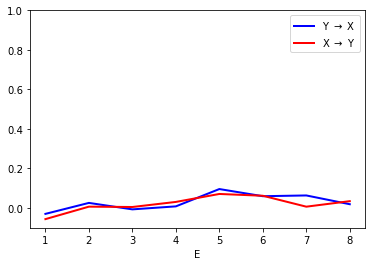

In [114]:
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)
results = run_optEmbedding(X_rand, Y_rand, lib_size, dims, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, dims)
plt.plot(dims, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(dims, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('E')
plt.ylim(-0.1,1)
plt.legend()

In [222]:
size = 100  # size of the 2D grid
dx = 2. / size  # space step
a = 2.8e-4 # 5e-3 #
T_a = size**2/a 
T_a

35714285.71428572

In [252]:
np.random.seed(seed=3) #9 18
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)

### no coupling

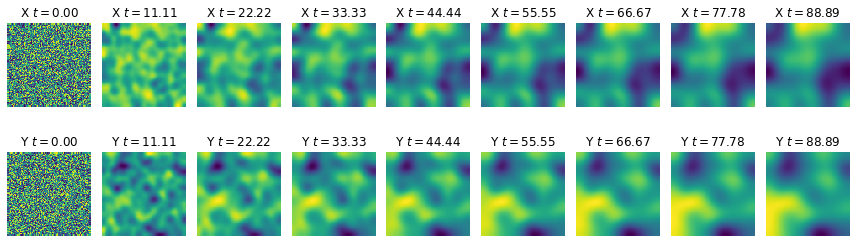

In [90]:
X, Y = plot(X_rand, Y_rand, T=100, c=0)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


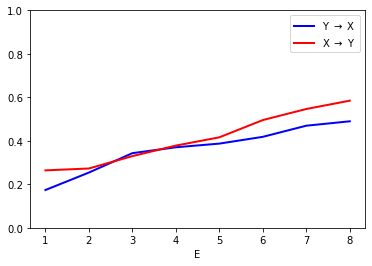

In [82]:
results = run_optEmbedding(X, Y, lib_size, dims, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, dims)
plt.plot(dims, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(dims, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('E')
plt.ylim(0,1)
plt.legend()

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


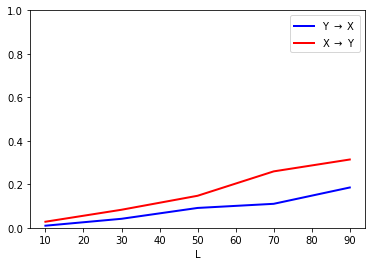

In [91]:
results = run_GCCM_corrected(X, Y, lib_sizes, E=3, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, lib_sizes)
plt.plot(lib_sizes, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(lib_sizes, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('L')
plt.ylim(0,1)
plt.legend()

### weak

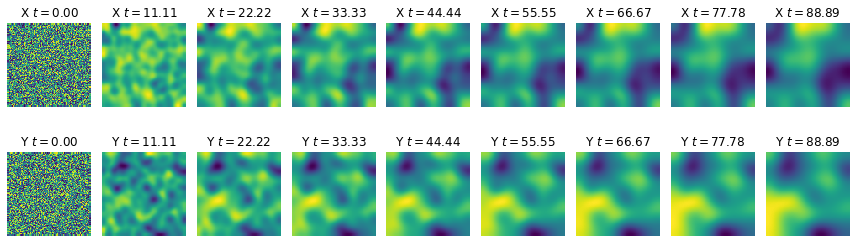

In [92]:
X, Y = plot(X_rand, Y_rand, T=100, c=0.0001)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


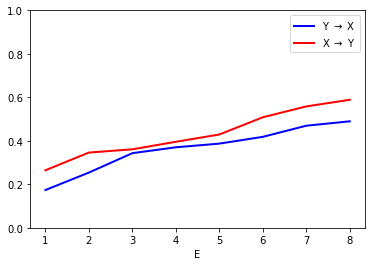

In [93]:
results = run_optEmbedding(X, Y, lib_size, dims, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, dims)
plt.plot(dims, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(dims, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('E')
plt.ylim(0,1)
plt.legend()

### moderate

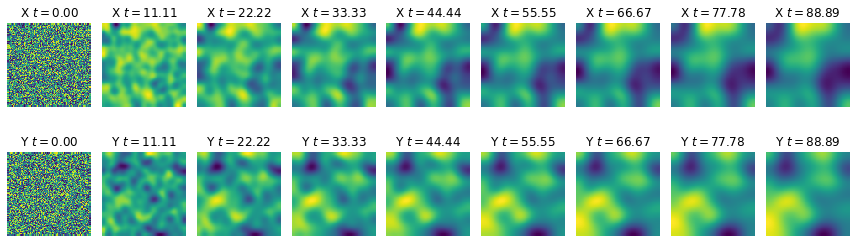

In [104]:
X, Y = plot(X_rand, Y_rand, T=100, c=0.1) # 0.01

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


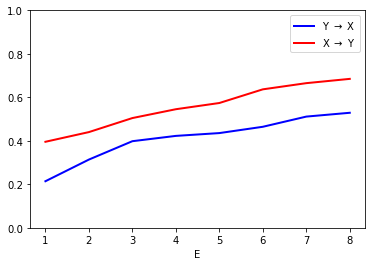

In [99]:
results = run_optEmbedding(X, Y, lib_size, dims, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, dims)
plt.plot(dims, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(dims, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('E')
plt.ylim(0,1)
plt.legend()

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


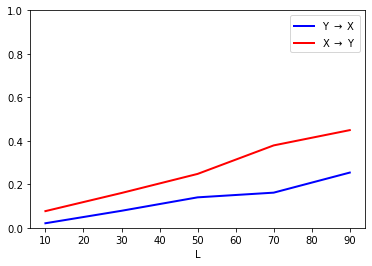

In [105]:
results = run_GCCM_corrected(X, Y, lib_sizes, E=3, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, lib_sizes)
plt.plot(lib_sizes, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(lib_sizes, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('L')
plt.ylim(0,1)
plt.legend()

### strong

As processes become tightly coupled, each tends to become a good estimators of the others’ dynamics even though causation is unidirectional

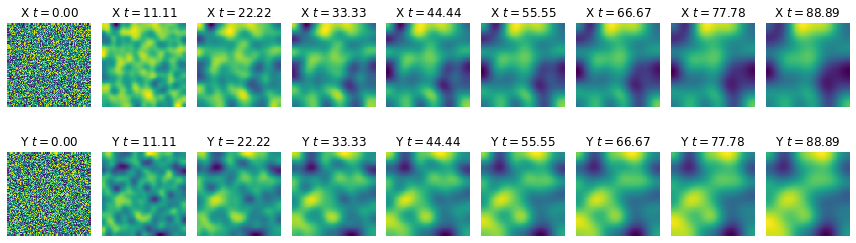

In [225]:
X, Y = plot(X_rand, Y_rand, T=100, c=0.2)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


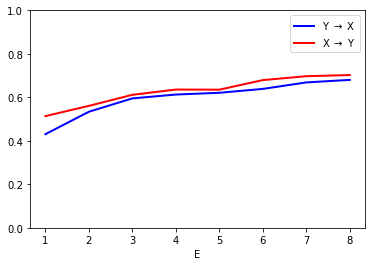

In [112]:
results = run_optEmbedding(X, Y, lib_size, dims, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, dims)
plt.plot(dims, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(dims, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('E')
plt.ylim(0,1)
plt.legend()

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


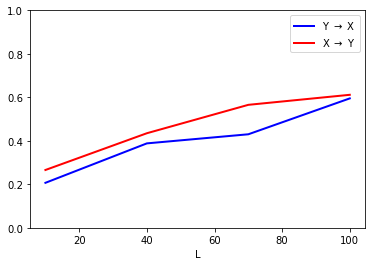

In [226]:
results = run_GCCM_corrected(X, Y, lib_sizes, E=3, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, lib_sizes)
plt.plot(lib_sizes, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(lib_sizes, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('L')
plt.ylim(0,1)
plt.legend()

## counter example

In [242]:
np.random.seed(seed=1) #9 18
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)

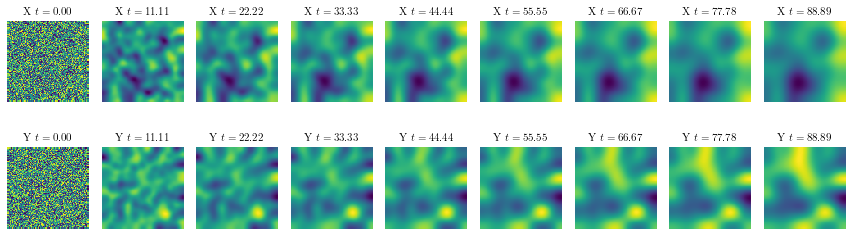

In [247]:
X, Y = plot(X_rand, Y_rand, T=100, c=0.1)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


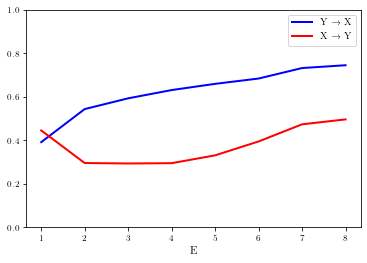

In [248]:
results = run_optEmbedding(X, Y, lib_size, dims, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, dims)
plt.plot(dims, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(dims, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('E')
plt.ylim(0,1)
plt.legend()

In [192]:
# Save the array to a file
#np.save('diffusion_data/unimodal_08_X.npy', X_rand)
#np.save('diffusion_data/unimodal_08_Y.npy', Y_rand)

# Localized

### no coupling

In [232]:
np.random.seed(seed=3) # 9 other direction 18

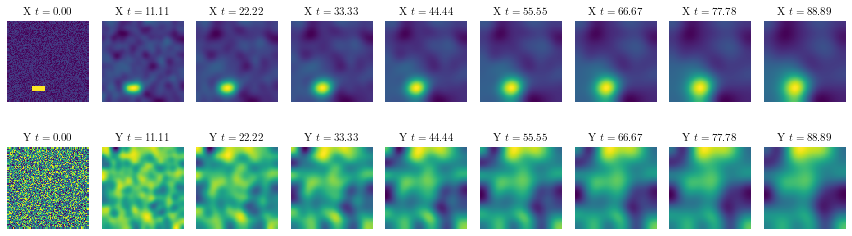

In [233]:
#Y_rand = np.random.uniform(0, 0.2, (size, size))
Y_rand = np.random.rand(size, size)
#Y_rand = np.random.normal(0, 0.2, (size, size))
X_loc = np.random.rand(size, size)
#X_loc = np.random.normal(0, 0.2, (size, size))

top_row, left_col = 80, 30
bottom_row, right_col = 85, 45
X_loc[top_row:bottom_row+1, left_col:right_col+1] = 5

X, Y = plot(X_loc, Y_rand, T=100, c=0)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


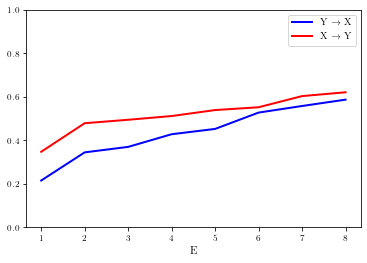

In [234]:
results = run_optEmbedding(X, Y, lib_size, dims, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, dims)
plt.plot(dims, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(dims, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('E')
plt.ylim(0,1)
plt.legend()

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


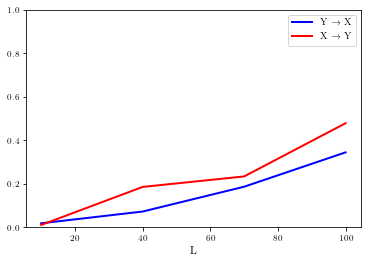

In [235]:
results = run_GCCM_corrected(X, Y, lib_sizes, E=2, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, lib_sizes)
plt.plot(lib_sizes, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(lib_sizes, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('L')
plt.ylim(0,1)
plt.legend()

### weak

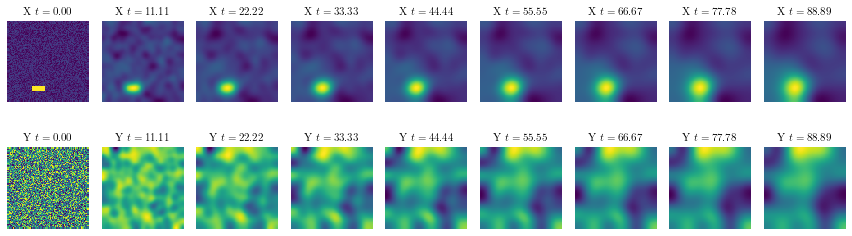

In [236]:
X, Y = plot(X_loc, Y_rand, T=100, c=0.001)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


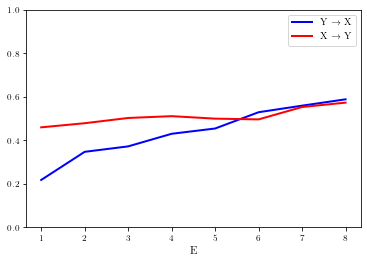

In [237]:
results = run_optEmbedding(X, Y, lib_size, dims, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, dims)
plt.plot(dims, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(dims, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('E')
plt.ylim(0,1)
plt.legend()

In [ ]:
results = run_GCCM_corrected(X, Y, lib_sizes, E=3, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, lib_sizes)
plt.plot(lib_sizes, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(lib_sizes, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('L')
plt.ylim(0,1)
plt.legend()

### moderate

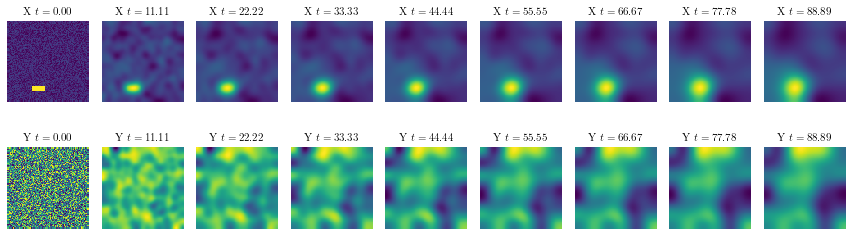

In [238]:
X, Y = plot(X_loc, Y_rand, T=100, c=0.01)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


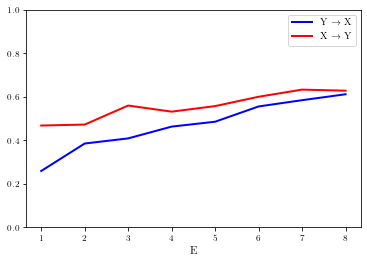

In [239]:
results = run_optEmbedding(X, Y, lib_size, dims, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, dims)
plt.plot(dims, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(dims, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('E')
plt.ylim(0,1)
plt.legend()

### strong

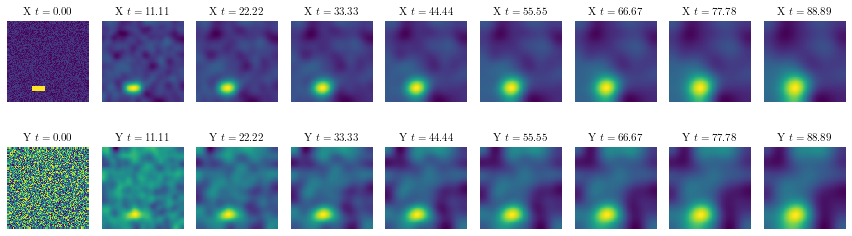

In [240]:
X, Y = plot(X_loc, Y_rand, T=100, c=0.1)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


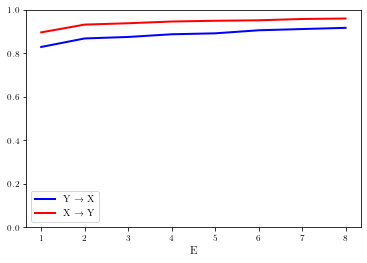

In [241]:
results = run_optEmbedding(X, Y, lib_size, dims, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, dims)
plt.plot(dims, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(dims, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('E')
plt.ylim(0,1)
plt.legend()

In [ ]:
results = run_GCCM_corrected(X, Y, lib_sizes, E=3, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, lib_sizes)
plt.plot(lib_sizes, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(lib_sizes, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('L')
plt.ylim(0,1)
plt.legend()

### initialisation

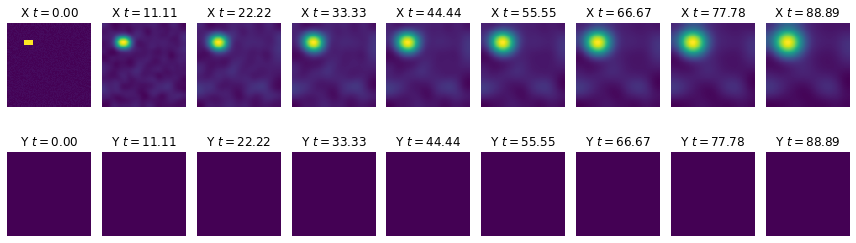

In [216]:
Y_fix = np.full((size, size), 0.1)
#Y_rand = np.random.uniform(0, 0.1, (size, size))
#Y_rand = np.random.rand(size, size)
#Y_rand = np.random.normal(0, 0.2, (size, size))
X_loc = np.random.uniform(0, 0.1, (size, size))
#X_loc = np.random.rand(size, size)
#X_loc = np.random.normal(0, 0.2, (size, size))

top_row, left_col = 20, 20
bottom_row, right_col = 25, 30
X_loc[top_row:bottom_row+1, left_col:right_col+1] = 3

X, Y = plot(X_loc, Y_fix, T=100, c=0)

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


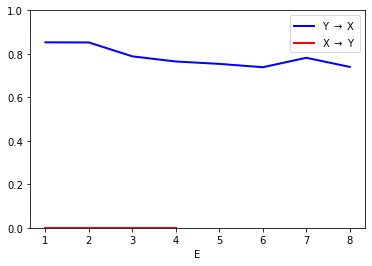

In [217]:
results = run_optEmbedding(X, Y, lib_size, dims, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, dims)
plt.plot(dims, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(dims, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('E')
plt.ylim(0,1)
plt.legend()

x_xmap_y
Constructing embedding
y_xmap_x
Constructing embedding


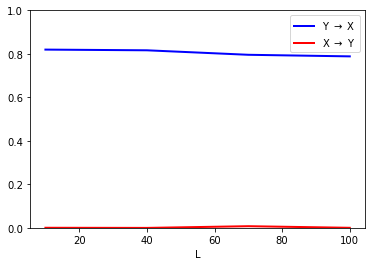

In [218]:
results = run_GCCM_corrected(X, Y, lib_sizes, E=3, cores=6)
x_xmap_y, y_xmap_x = get_mean(results, lib_sizes)
plt.plot(lib_sizes, x_xmap_y,  c='b', lw=2, label = r'Y $\rightarrow$ X' ) 
plt.plot(lib_sizes, y_xmap_x,  c='r', lw=2, label = r'X $\rightarrow$ Y' )
plt.xlabel('L')
plt.ylim(0,1)
plt.legend()

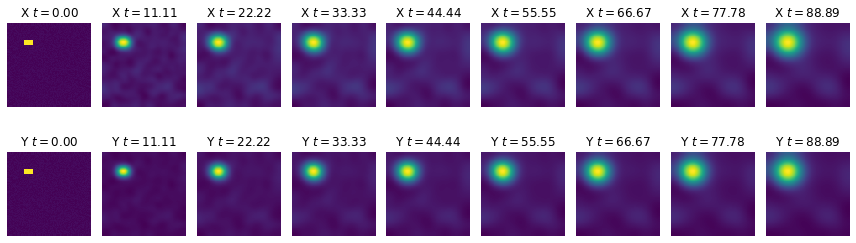

In [220]:
X, Y = plot(X_loc, Y_fix, T=100, c=0.01)

# Cofounder Z



$$ \frac{\partial z}{\partial t} = d_1 \Delta z - z^2 $$

$$ \frac{\partial x}{\partial t} = d_0 \Delta x - x^2 + c_1z $$

$$ \frac{\partial y}{\partial t} = d_0 \Delta y - y^2 + c_0 ~xy + c_2z $$

In [106]:
def plot_confound(X, Y, Z, T, c0, cx, cy, a, b):
    
    dt = .001  # time step, 
    n = int(T / dt)  # number of iterations

    fig, axes = plt.subplots(3,9, figsize=(12, 4))
    step_plot = n // 9
    # We simulate the PDE with the finite difference
    # method.
    for i in range(n):
        # We compute the Laplacian of u and v.
        deltaZ = laplacian(Z)
        deltaX = laplacian(X)
        deltaY = laplacian(Y)
        # We take the values of u and v inside the grid.
        Zc = Z[1:-1, 1:-1]
        Xc = X[1:-1, 1:-1]
        Yc = Y[1:-1, 1:-1]
        
        # We update the variables.
        Z[1:-1, 1:-1], X[1:-1, 1:-1], Y[1:-1, 1:-1] = \
            Zc + dt * (b * deltaZ - Zc**2),\
            Xc + dt * (a * deltaX - Xc**2 + cx*Zc),\
            Yc + dt * (a * deltaY - Yc**2 + c0 * Xc * Yc + cy*Zc)
        
        # Neumann conditions: derivatives at the edges
        # are null.
        for B in (X, Y, Z):
            B[0, :] = B[1, :]
            B[-1, :] = B[-2, :]
            B[:, 0] = B[:, 1]
            B[:, -1] = B[:, -2]
    
        # We plot the state of the system at
        # 9 different times.
        if i % step_plot == 0 and i < 9 * step_plot:
            ax = axes[0, i // step_plot]
            show_patterns(Z, ax=ax)
            ax.set_title(f'Z $t={i * dt:.2f}$')
            
            ax = axes[1, i // step_plot]
            show_patterns(X, ax=ax)
            ax.set_title(f'X $t={i * dt:.2f}$')
            
            ax = axes[2, i // step_plot]
            show_patterns(Y, ax=ax)
            ax.set_title(f'Y $t={i * dt:.2f}$')
    plt.tight_layout()

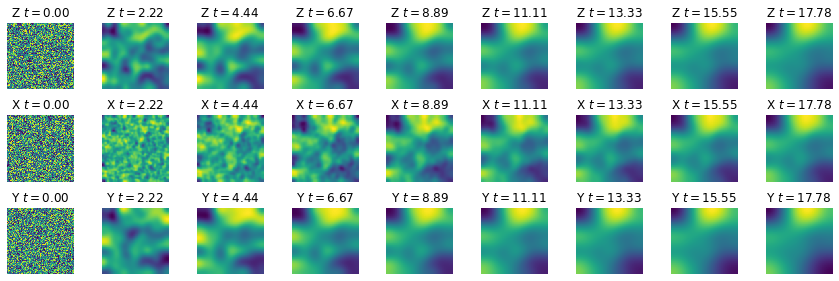

In [168]:
Z_rand = np.random.rand(size, size)
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)

plot_confound(X_rand, Y_rand, Z_rand, T=20, c0=0, cx=0.4, cy=0.4, a=2.64e-3, b=2.8e-4)

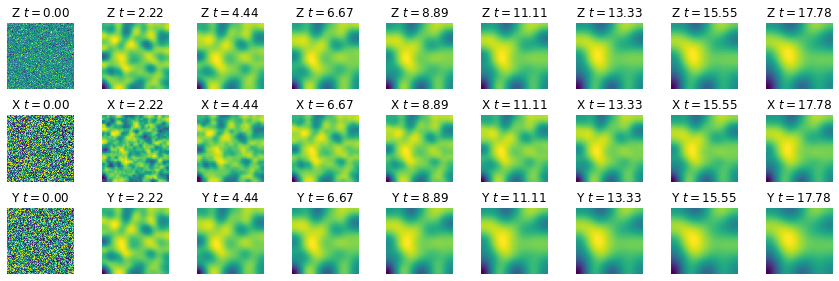

In [169]:
Z_rand = np.random.normal(1,2,(size, size))
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)

plot_confound(X_rand, Y_rand, Z_rand, T=20, c0=0, cx=0.4, cy=0.4, dz=2.64e-3, dx=2.8e-4, dy=5e-3)

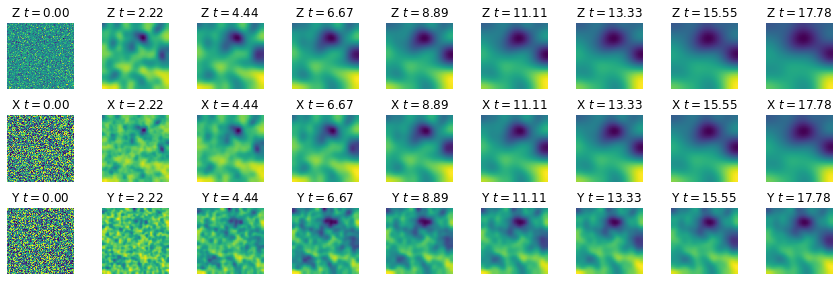

In [172]:
Z_rand = np.random.normal(1,2,(size, size))
X_rand = np.random.rand(size, size)
Y_rand = np.random.rand(size, size)

plot_confound(X_rand, Y_rand, Z_rand, T=20, c0=0, cx=0.8, cy=0.1, dz=2.64e-3, dx=2.8e-4, dy=2.8e-4)

- what is strong, what is weak coupling? c
- when is burn in done? T
- how to set diffusion constant in counterfactual case? d1, d2, d3
- initialize X and Y differently?

## Clark (2015)

$$ Y(t + 1) = Y(t)\Bigl(r_Y - r_YY(t) \Bigr) $$
$$ X(t + 1) = X(t)\Bigl(r_X - r_XX(t) - \alpha Y(t)\Bigr) $$

In [7]:
def make_ccm_data(sp_sd=0.125, obs_sd=0.025, Sstr=0.625, times=10, burnin=100, number_of_chains=20, seednum=2718):
    '''
    sp_sd, Standard deviation used to add process noise
    obs_sd, Standard deviatoin used to add observation error (<= 0.05)
    Sstr, Forcing strength of process alpha (weak forcing 0.625)
      
    times, How many sequential observations in each plot?
    burnin, Burnin time before starting the experiment.
    Is used to remove correlation among plots that occurs because of starting condition
    '''
    
    # Set seed for generating random numbers
    np.random.seed(seednum)

    # Create empty lists to store results
    Accm = []
    Bccm = []
    time_ccm = []

    for i in range(number_of_chains):
        # Add process error to species intrinsic growth rates
        rx = 3.8 + np.random.normal(0, sp_sd)
        ry = 3.6 + np.random.normal(0, sp_sd)

        # Simulate competition
        x = np.zeros(times + burnin)
        y = np.zeros(times + burnin)
        x[0] = np.random.uniform()
        y[0] = np.random.uniform()
        
        for ii in range(1, times + burnin):
            x[ii] = x[ii-1] * (rx - rx * x[ii-1] - Sstr * y[ii-1])
            y[ii] = y[ii-1] * (ry - ry * y[ii-1])

            # Reflecting boundaries for population >1 or <0
            while x[ii] < 0 or x[ii] > 1:
                if x[ii] < 0:
                    x[ii] = -x[ii]
                if x[ii] > 1:
                    x[ii] = 1 + (1 - x[ii])

            while y[ii] < 0 or y[ii] > 1:
                if y[ii] < 0:
                    y[ii] = -y[ii]
                if y[ii] > 1:
                    y[ii] = 1 + (1 - y[ii])
        
        # Remove data from burnin time
        x = x[burnin:]
        y = y[burnin:]

        # Add multiplicative observation error
        x = x * np.random.lognormal(0, obs_sd, len(x))
        y = y * np.random.lognormal(0, obs_sd, len(y))

        # Save variables
        Accm.extend([np.nan] + list(x))
        Bccm.extend([np.nan] + list(y))
        time_ccm.extend([np.nan] + list(range(1, times + 1)))

    return {'Accm': Accm, 'Bccm': Bccm, 'time_ccm': time_ccm}

In [8]:
# Example usage
result = make_ccm_data(times=100, number_of_chains=1)

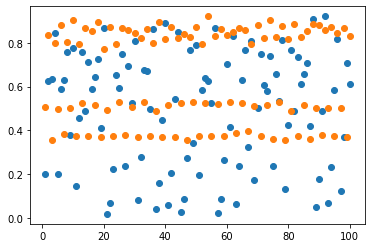

In [9]:
plt.plot(result['time_ccm'], result['Accm'], 'o')
plt.plot(result['time_ccm'], result['Bccm'], 'o')

In [10]:
# set parameters
size = 50  # size of the 2D grid
dx = 1. / size  # space step

T = 100  # total time
dt = .1  # time step
n = int(T / dt)  # number of iterations

a = 2.8e-4 #2.8e-4
b = 2.8e-4 #5e-3

sp_sd=0.125
obs_sd=0.025
Sstr=0.625

# Add process error to species intrinsic growth rates
rx = 3.8 + np.random.normal(0, sp_sd, (size, size))
ry = 3.6 + np.random.normal(0, sp_sd, (size, size))

rx = rx[1:-1, 1:-1]
ry = ry[1:-1, 1:-1]

In [11]:
n

1000

In [12]:
plot = n/10
plot

100.0

In [13]:
# Simulate competition
V = np.random.rand(size, size)
U = np.random.rand(size, size)

In [14]:
U = np.random.normal(0, 0.2, (size, size))
V = np.full((size, size), 0.1)
V = np.full((size, size), 0.1)

top_row, left_col = 10, 10
bottom_row, right_col = 10, 10
V[top_row:bottom_row+1, left_col:right_col+1] = 0.2

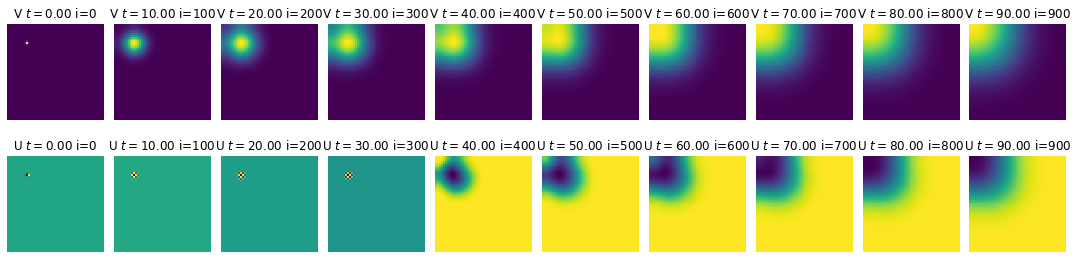

In [15]:
fig, axes = plt.subplots(2,10, figsize=(15, 4))
p = 0
# We simulate the PDE with the finite difference
# method.
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    
    # We update the variables.
    '''rx*Uc - rx*Uc**2 - Sstr * Uc * Vc
    ry*Vc - ry*Vc**2'''
    '''Uc + dt * (a * deltaU + Uc - Sstr * Vc),\
        Vc + dt * (b * deltaV - Vc)'''
    '''3.8*Uc + dt*(a * deltaU - 3.8*Uc**2 - 0.02*Uc*Vc) ,\
        3.5*Vc + dt*(b * deltaV - 3.5*Vc**2)'''

    '''Uc + dt * (a * deltaU + Uc - Sstr * Uc*Vc),\
        Vc + dt * (b * deltaV - Vc**2)'''
    
    '''Uc + 1 * (a * deltaU - Sstr * deltaV*deltaU - a * Uc),\
        Vc + 1 * (b * deltaV - Vc**2)'''
    '''Uc + dt * (a * deltaU - Uc**2 + Sstr * deltaV*deltaU) ,\
        Vc + dt * (b * deltaV - Vc**2)'''

    V[1:-1, 1:-1], U[1:-1, 1:-1] = \
        Vc + dt * (a * deltaV - b * Vc**2) ,\
        Uc + dt * (a * deltaU - 0.02*deltaV*deltaU - a * Uc)
        
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

    if i % plot == 0:
    #if i < 10:

        ax = axes[0, p]
        show_patterns(V, ax=ax)
        ax.set_title(f'V $t={i * dt:.2f}$'+' i='+str(i))
        
        ax = axes[1, p]
        show_patterns(U, ax=ax)
        ax.set_title(f'U $t={i * dt:.2f}$'+' i='+str(i))

        p += 1

plt.tight_layout()